# Лабораторная работа №3
Группа 45/2
---

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Задание 0.**

In [30]:
# Загрузка данных из файла titanic.csv
data = pd.read_csv('titanic.csv')

# Вывести количество объектов (строк) и характеристик (столбцов) в таблице данных
num_rows, num_columns = data.shape
columns = data.columns.tolist()

print(f"Число объектов (строк): {num_rows}")
print(f"Число характеристик (столбцов): {num_columns}")
print(f"Характеристики (столбцы): {columns}")

Число объектов (строк): 891
Число характеристик (столбцов): 12
Характеристики (столбцы): ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [31]:
# Подсчитать количество пропусков в каждом столбце
missing_values = data.isnull().sum()

# Вывод столбцов с пропусками (если они есть) и количество пропусков в каждом
for column, count in missing_values.items():
    if count > 0:
        print(f"Столбец '{column}' содержит {count} пропусков.")

if count == 0:
    print("В данных пропусков нет.")


Столбец 'Age' содержит 177 пропусков.
Столбец 'Cabin' содержит 687 пропусков.
Столбец 'Embarked' содержит 2 пропусков.


In [32]:
# Статистика по численным признакам
numeric_statistics = data.describe()

print(numeric_statistics)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [33]:
# Более подробное описание значений признаков
data_info = data.info()

print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [34]:
# Заполнение пропущенных значений в столбце 'Age' медианным возрастом
median_age = data['Age'].median()
data['Age'].fillna(median_age, inplace=True)

# Удаление столбца 'Cabin' из набора данных
data.drop(columns=['Cabin'], inplace=True)

# Заполнение пропущенных значений в столбце 'Embarked' наиболее часто встречающимся значением (модой)
mode_embarked = data['Embarked'].mode()[0]
data['Embarked'].fillna(mode_embarked, inplace=True)

# Проверка, что пропущенных значений больше нет
missing_values = data.isnull().sum()
print("Пропущенных значений после обработки:\n", missing_values)

Пропущенных значений после обработки:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


**Задание 1.**
Найти количество наблюдений для каждого значения целевой переменной Survived и применить к
полученным данным метод plot, чтобы построить столбчатую диаграмму.

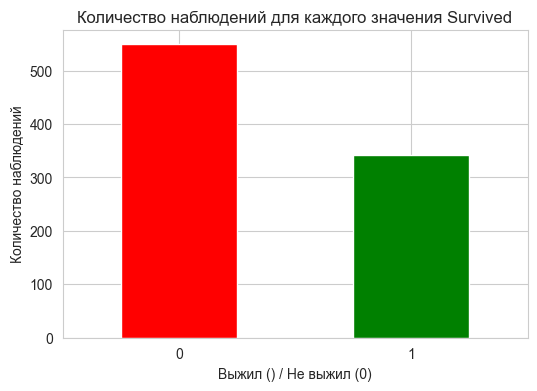

In [35]:
# Подсчет количества наблюдений для каждого значения Survived
survival_counts = data['Survived'].value_counts()

# Построение столбчатой диаграммы
plt.figure(figsize=(6, 4))
survival_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Количество наблюдений для каждого значения Survived')
plt.xlabel('Выжил () / Не выжил (0)')
plt.ylabel('Количество наблюдений')
plt.xticks(rotation=0)
plt.show()

**Задание 2.**
Построить такую же диаграмму, используя логарифмический масштаб.

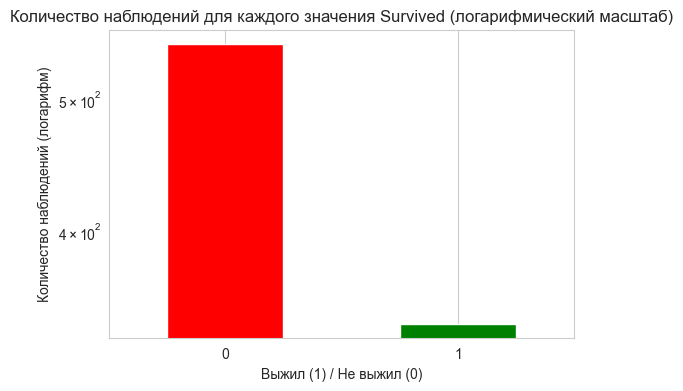

In [36]:
# Подсчет количества наблюдений для каждого значения Survived
survival_counts = data['Survived'].value_counts()

# Построение столбчатой диаграммы с логарифмическим масштабом по оси y
plt.figure(figsize=(6, 4))
survival_counts.plot(kind='bar', color=['red', 'green'])
plt.yscale('log')  # Установка логарифмического масштаба по оси y
plt.title('Количество наблюдений для каждого значения Survived (логарифмический масштаб)')
plt.xlabel('Выжил (1) / Не выжил (0)')
plt.ylabel('Количество наблюдений (логарифм)')
plt.xticks(rotation=0)
plt.show()

**Задание 3.**
Построить две гистограммы по значениям признака Pclass - одну для выживших (Survived равен 1) и другую - нет (Survived равен 0).

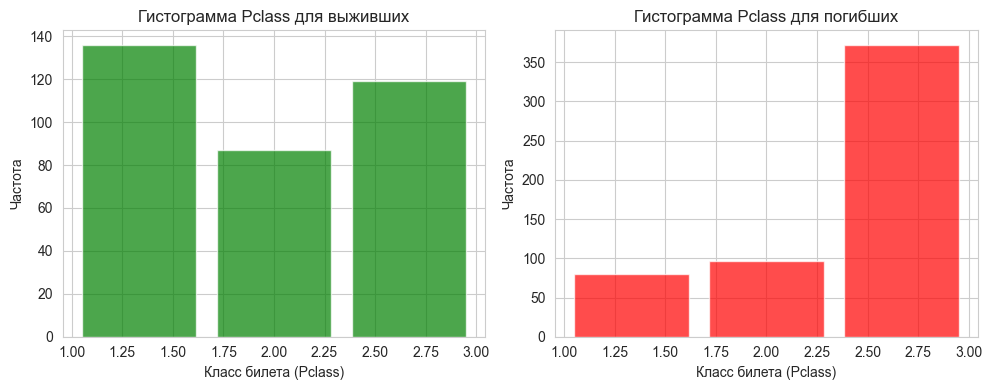

In [37]:
# Разделение данных на две подвыборки: выжившие и погибшие
survived_data = data[data['Survived'] == 1]
not_survived_data = data[data['Survived'] == 0]

# Построение гистограммы для класса билета (Pclass) для выживших
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(survived_data['Pclass'], bins=3, color='green', alpha=0.7, rwidth=0.85)
plt.title('Гистограмма Pclass для выживших')
plt.xlabel('Класс билета (Pclass)')
plt.ylabel('Частота')

# Построение гистограммы для класса билета (Pclass) для погибших
plt.subplot(1, 2, 2)
plt.hist(not_survived_data['Pclass'], bins=3, color='red', alpha=0.7, rwidth=0.85)
plt.title('Гистограмма Pclass для погибших')
plt.xlabel('Класс билета (Pclass)')
plt.ylabel('Частота')

plt.tight_layout()  # Для корректного отображения графиков
plt.show()

**Задание 4.**
Подобрать значение аргумента density так, чтобы по вертикали графика было расположено не число наблюдений, а плотность распределения. Число бинов должно равняться 20 для обеих гистограмм, а коэфф ициент alpha равным 0.5, чтобы гистограммы были полуп розрачными и не загораживали
друг друга.

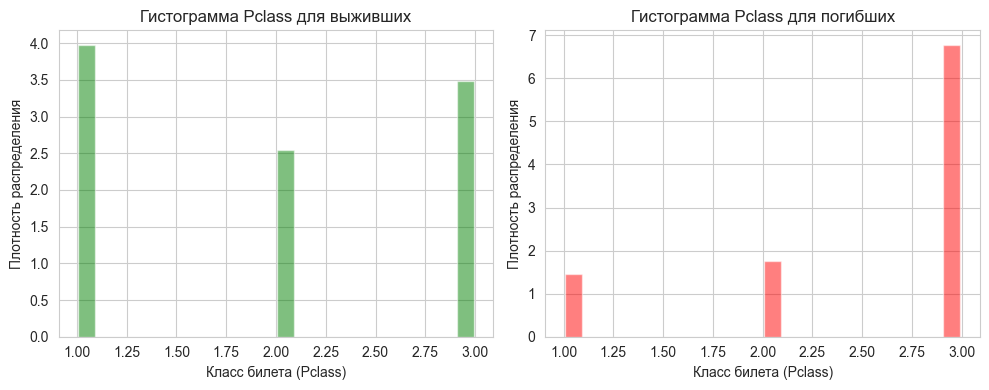

In [38]:
# Разделение данных на две подвыборки: выжившие и погибшие
survived_data = data[data['Survived'] == 1]
not_survived_data = data[data['Survived'] == 0]

# Построение гистограммы для класса билета (Pclass) для выживших
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(survived_data['Pclass'], bins=20, color='green', alpha=0.5, rwidth=0.85, density=True)
plt.title('Гистограмма Pclass для выживших')
plt.xlabel('Класс билета (Pclass)')
plt.ylabel('Плотность распределения')

# Построение гистограммы для класса билета (Pclass) для погибших
plt.subplot(1, 2, 2)
plt.hist(not_survived_data['Pclass'], bins=20, color='red', alpha=0.5, rwidth=0.85, density=True)
plt.title('Гистограмма Pclass для погибших')
plt.xlabel('Класс билета (Pclass)')
plt.ylabel('Плотность распределения')

plt.tight_layout()  # Для корректного отображения графиков
plt.show()

**Задание 5.**
Создать легенду с двумя значениями: “ Survived 0” и “ Survived 1”. Гистограмма обычных транзакций должна быть серого цвета, а мошеннических - красного. Название горизонтальной оси – “ Survived ”.

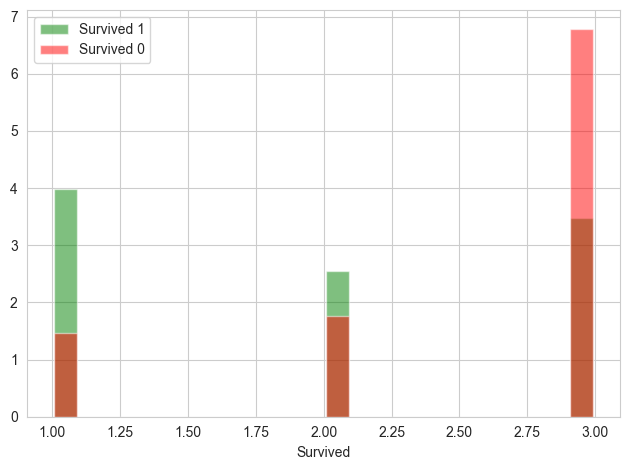

In [39]:
# Разделение данных на две подвыборки: выжившие и погибшие
survived_data = data[data['Survived'] == 1]
not_survived_data = data[data['Survived'] == 0]

# Построение гистограммы для класса билета (Pclass) для выживших (зеленая)
plt.hist(survived_data['Pclass'], bins=20, color='green', alpha=0.5, rwidth=0.85, density=True, label='Survived 1')

# Построение гистограммы для класса билета (Pclass) для погибших (красная)
plt.hist(not_survived_data['Pclass'], bins=20, color='red', alpha=0.5, rwidth=0.85, density=True, label='Survived 0')

# Добавление легенды
plt.legend()

# Установка названия горизонтальной оси
plt.xlabel('Survived')

plt.tight_layout()
plt.show()

**Задание 6.**
Аналогично изобразить гистограмму выживаемости относительно пола пассажиров

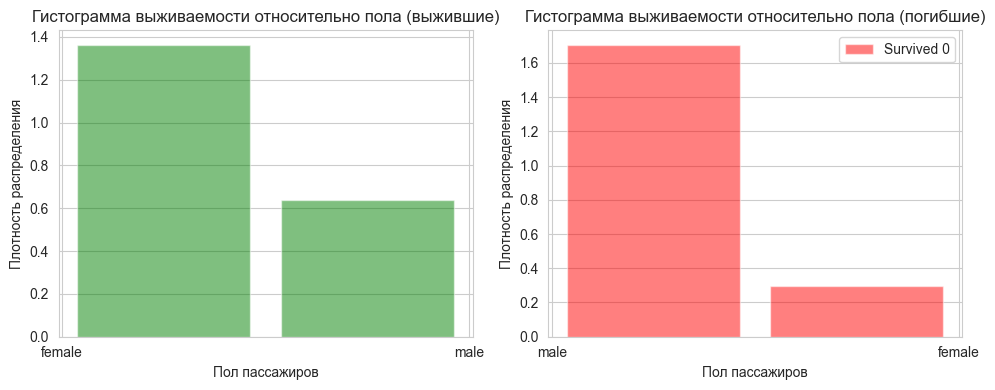

In [40]:
# Разделение данных на две подвыборки: выжившие и погибшие
survived_data = data[data['Survived'] == 1]
not_survived_data = data[data['Survived'] == 0]

# Построение гистограммы выживаемости относительно пола пассажиров (зеленая для выживших, красная для погибших)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(survived_data['Sex'], bins=2, color='green', alpha=0.5, rwidth=0.85, density=True, label='Survived 1')
plt.title('Гистограмма выживаемости относительно пола (выжившие)')
plt.xlabel('Пол пассажиров')
plt.ylabel('Плотность распределения')

plt.subplot(1, 2, 2)
plt.hist(not_survived_data['Sex'], bins=2, color='red', alpha=0.5, rwidth=0.85, density=True, label='Survived 0')
plt.title('Гистограмма выживаемости относительно пола (погибшие)')
plt.xlabel('Пол пассажиров')
plt.ylabel('Плотность распределения')

# Добавление легенды
plt.legend()

plt.tight_layout()
plt.show()

**Задание 7.**
Получить следующие диаграммы

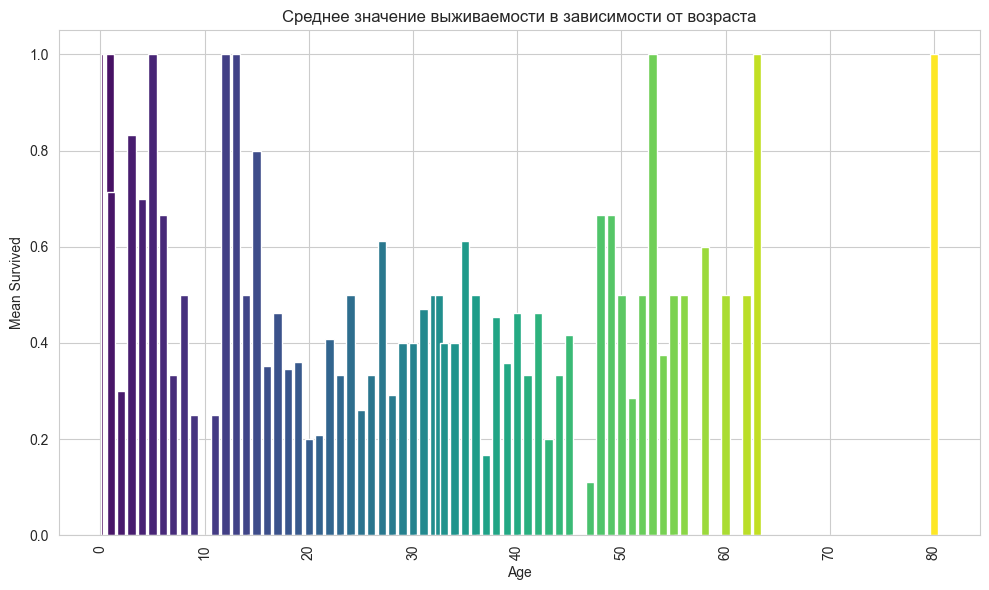

In [41]:
# Очистите данные от строк, в которых отсутствует возраст (Age)
df = data.dropna(subset=['Age'])

# Группируем данные по возрасту и вычисляем среднее значение выживаемости
age_survived_mean = df.groupby('Age')['Survived'].mean().reset_index()

# Создаем цветовую карту (colormap) для раскраски столбцов
colors = plt.cm.viridis(np.linspace(0, 1, len(age_survived_mean['Age'])))

# Строим диаграмму с раскрашенными столбцами
plt.figure(figsize=(10, 6))
plt.bar(age_survived_mean['Age'], age_survived_mean['Survived'], color=colors)
plt.xlabel('Age')
plt.ylabel('Mean Survived')
plt.title('Среднее значение выживаемости в зависимости от возраста')
plt.xticks(rotation=90)  # Поворот меток по оси x для лучшей читаемости
plt.tight_layout()
plt.show()

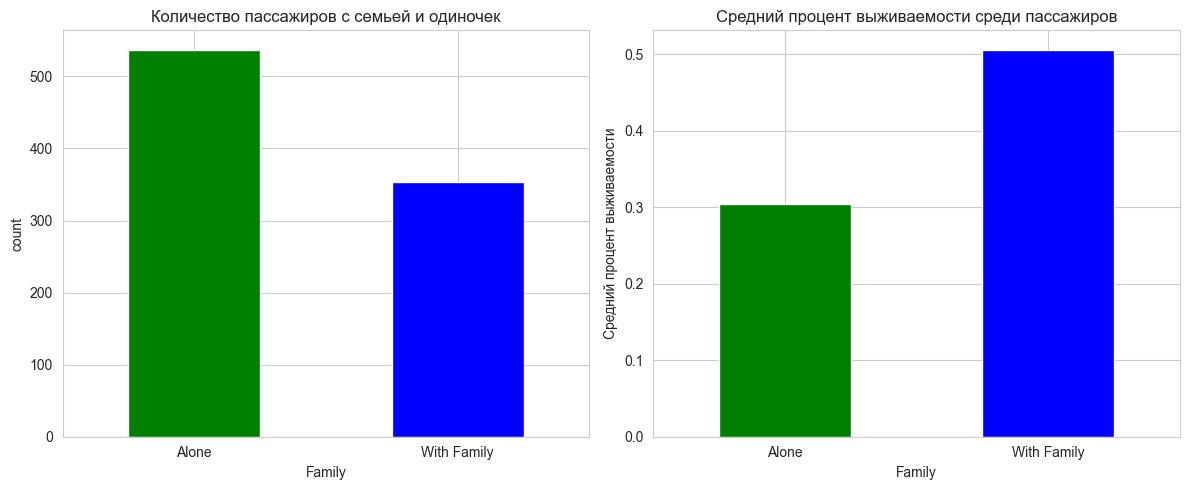

In [42]:
# Создадим новый столбец 'Family' для обозначения наличия семьи у пассажиров
df['Family'] = (df['SibSp'] + df['Parch'] > 0).astype(int)


# Первый график: количество пассажиров с семьей и одиночек
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df['Family'].value_counts().plot(kind='bar', rot=0, color=["green", "blue"])
plt.xticks([0, 1], ['Alone', 'With Family'])
plt.xlabel('Family')
plt.ylabel('count')
plt.title('Количество пассажиров с семьей и одиночек')

# Второй график: количество выживших среди пассажиров с семьей и одиночек
plt.subplot(1, 2, 2)
df.groupby('Family')['Survived'].mean().plot(kind='bar', rot=0, color=["green", "blue"])
plt.xticks([0, 1], ['Alone', 'With Family'])
plt.xlabel('Family')
plt.ylabel('Средний процент выживаемости')
plt.title('Средний процент выживаемости среди пассажиров')

plt.tight_layout()
plt.show()
